In [2]:
import matplotlib.pyplot as plt
import numpy as np

import Util.Global as g
import Util.Plot as show
import Util.Aux as aux
from Classes.AP import AP
from Classes.UE import UE
from Classes.Factory import Factory
from Classes.Cluster import Cluster

%load_ext autoreload
%autoreload 2

## Setup environment

In [4]:
ues = [*map(lambda _: Factory.sampleUE(shift = 20), range(g.N_UES))]
aps = Factory.topologyAP(type = 'poisson', data = {'distance': 50}, shift = 100)

### Show environment (optional)

In [ ]:
show.env(ues, aps)

## Run simulation

### Init variables

In [6]:
c = Cluster()
dist_bp = aux.breakpoint_distance()
noise_var = aux.noise_power()

### Perform pathloss

In [7]:
for ue in ues:
    for id_ap, ap in enumerate(aps):
        ue.dist_3D[id_ap] = aux.calc_distance(ue.position, ap.position)
        ue.dist_2D[id_ap] = aux.calc_distance(ue.position[:-1], ap.position[:-1])
        ue.los_prob[id_ap] = aux.los_probability('UMI', ue.dist_2D[id_ap], threshold2D = g.UMI_THRESHOLD_DIST)
        
        # calcular o ganho da 'ue' para a 'ap'
        _, _, pl, los = aux.path_loss('UMI', ue.los_prob[id_ap], ue.dist_2D[id_ap], ue.dist_3D[id_ap], dist_bp, noise_var)
        ue.gains[id_ap] = pl
        ue.los[id_ap] = los

### Cluster UEs and APs

In [9]:
c.cluster(ues, aps, type = 'dist')

### Show env and params

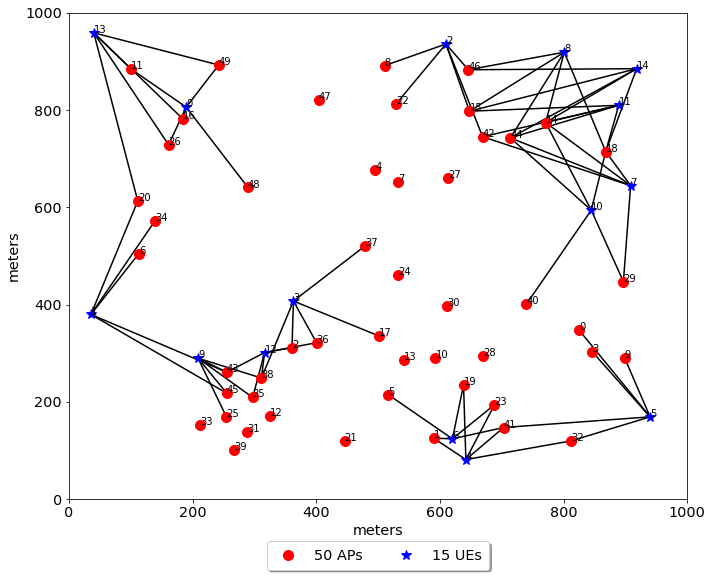

In [11]:
_, _ = show.env(ues, aps, plot_c = True)

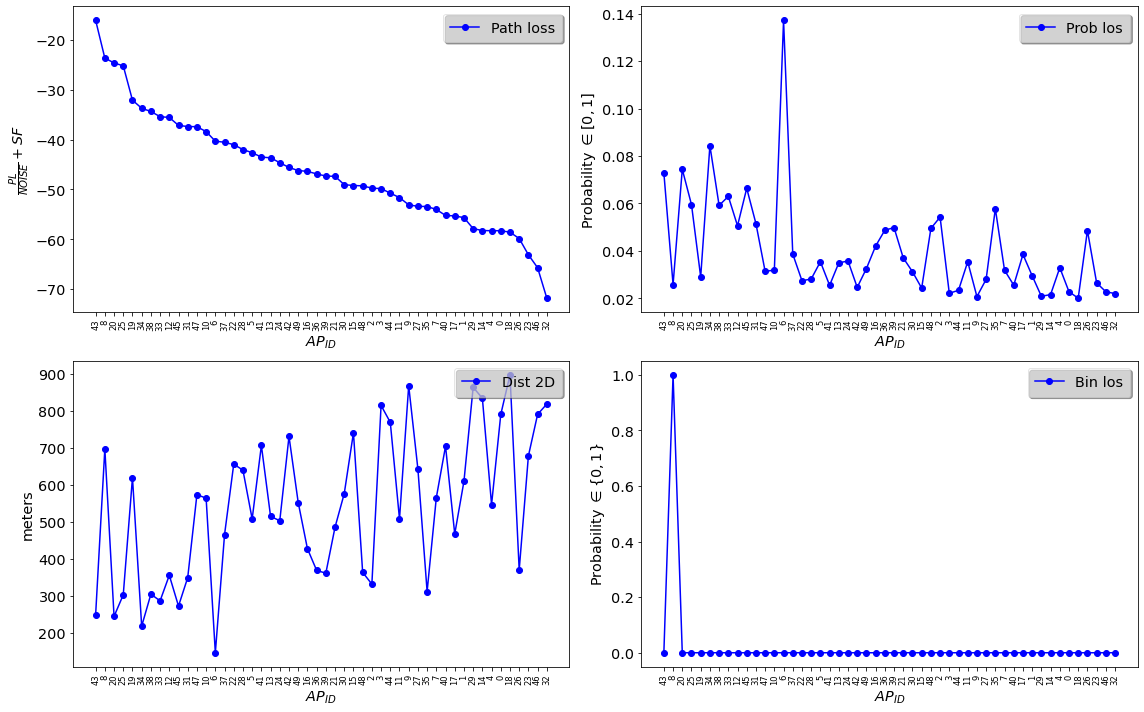

In [12]:
show.ue_params(ues[1], 'pareto')